# CA Data Science Take-home Problem

This is a starter python 3 notebook for this problem. It will pull the airline data csvs and put them in a dataframe to work with. Please see the repository readme for more details and instructions.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import requests

import seaborn as sns
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET

pd.set_option('display.max_columns', None)

## Loading the CSVs

In [2]:
r = requests.get('http://ca-data-science-interview.s3.amazonaws.com')
xml = r.text

csvs = []
root = ET.fromstring(xml)
    
for content in root.findall('{http://s3.amazonaws.com/doc/2006-03-01/}Contents'):
    key = content.find('{http://s3.amazonaws.com/doc/2006-03-01/}Key').text
    csvs.append(key)
    
for csv in csvs:
    csv_file = 'http://ca-data-science-interview.s3.amazonaws.com/' + csv
    print("-- fetching %s" % csv_file)
    r = requests.get(csv_file, stream = True)
    with open(csv, "wb") as f:
        for chunk in r.iter_content(chunk_size = 1024):
            if chunk:
                f.write(chunk)

    
df = pd.concat([pd.read_csv(csv, low_memory=False) for csv in csvs])
df = df.drop("Unnamed: 37", axis = 1) # All of the lines in the CSVs have an extra comma at the end that gets interpreted as an unnamed column.
df.head()

-- fetching http://ca-data-science-interview.s3.amazonaws.com/701878033_T_ONTIME_2015_8.csv
-- fetching http://ca-data-science-interview.s3.amazonaws.com/701878033_T_ONTIME_2016_8.csv
-- fetching http://ca-data-science-interview.s3.amazonaws.com/701878033_T_ONTIME_2017_8.csv


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2015,3,8,8,6,2015-08-08,19690,HA,N491HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1738.0,-4.0,1829,1820.0,-9.0,0.0,NaN,0.0,47.0,42.0,27.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
1,2015,3,8,9,7,2015-08-09,19690,HA,N493HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1741.0,-1.0,1829,1822.0,-7.0,0.0,NaN,0.0,47.0,41.0,28.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
2,2015,3,8,10,1,2015-08-10,19690,HA,N491HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1733.0,-9.0,1829,1818.0,-11.0,0.0,NaN,0.0,47.0,45.0,26.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
3,2015,3,8,11,2,2015-08-11,19690,HA,N485HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1735.0,-7.0,1829,1821.0,-8.0,0.0,NaN,0.0,47.0,46.0,27.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN
4,2015,3,8,12,3,2015-08-12,19690,HA,N485HA,248,12173,HNL,"Honolulu, HI",HI,12758,KOA,"Kona, HI",HI,1742,1738.0,-4.0,1829,1816.0,-13.0,0.0,NaN,0.0,47.0,38.0,26.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN


## A basic view of the data

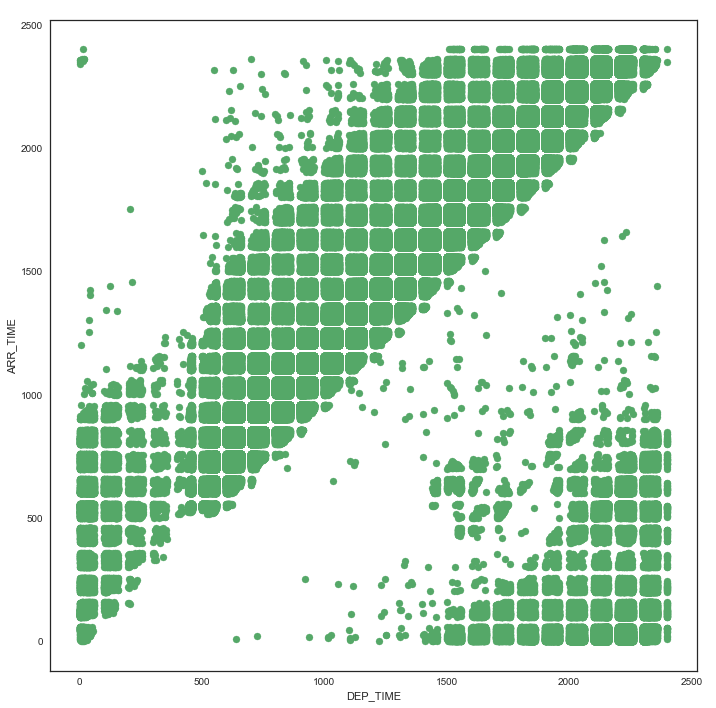

In [3]:
# Plot of Departure Time versus Arrival Time (24-Hour Clock)

sns.set(style="white", color_codes=True)
grid = sns.JointGrid(x='DEP_TIME', y='ARR_TIME', data=df, space=0, size=10, ratio=50)
grid.plot_joint(plt.scatter, color="g")